In [370]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [372]:
df = pd.read_csv('spam.csv',encoding='ANSI')

In [374]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [376]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [378]:
df.shape

(5572, 5)

<h3>Data cleaning</h3>

In [381]:
# columns unnamed 2, unnamed 3, unnamed 4 don't have that much data hence dropping them

In [383]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [385]:
df['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [387]:
df = df.rename(columns = {'v1':'target','v2':'sms'})
df.sample(5)

,target,sms
4991,ham,I'm hungry buy smth home...
2692,spam,Urgent Urgent! We have 800 FREE flights to Eur...
2925,ham,Im done. Just studyn in library
1401,ham,Kaiez... Enjoy ur tuition... Gee... Thk e seco...
5100,ham,"Aight, call me once you're close"


In [389]:
# checking for duplicate values
df.duplicated().sum()

403

In [391]:
df = df.drop_duplicates(keep='first')
df.shape

(5169, 2)

In [393]:
df.duplicated().sum()

0

In [395]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [397]:
df['target'] = le.fit_transform(df['target'])
df.sample(5)

,target,sms
5112,1,December only! Had your mobile 11mths+? You ar...
3938,0,Y Ì_ wan to go there? C doctor?
5149,0,Pls call me da. What happen.
3588,0,I've sent my wife your text. After we buy them...
237,0,Where are you?when wil you reach here?


<h3>EDA

In [400]:
df.sample(5)

,target,sms
1080,0,You tell what happen dont behave like this to ...
5207,0,"Babe, I'm answering you, can't you see me ? Ma..."
974,0,Eh u send wrongly lar...
1759,0,Do u ever get a song stuck in your head for no...
1684,0,Do you want bold 2 or bb torch


In [402]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

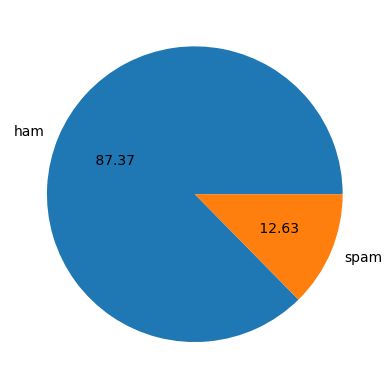

In [404]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='% 0.2f')
plt.show()

In [406]:
# data is imbalanced

In [408]:
!pip install nltk

In [409]:
import nltk

In [410]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\upadh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [414]:
df['num_characters'] = df['sms'].apply(len)
df['num_words'] = df['sms'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['sms'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [416]:
df.sample(5)

,target,sms,num_characters,num_words,num_sentences
3188,0,X2 &lt;#&gt; . Are you going to get that,41,15,2
4884,0,Poor girl can't go one day lmao,31,8,1
1000,0,No..but heard abt tat..,23,7,1
1935,0,Did either of you have any idea's? Do you know...,76,17,2
229,0,Dear good morning now only i am up,34,8,1


In [418]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [420]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [422]:
# On an average the number of words, number of sentences and number of characters are all greater in spam sms

<Axes: >

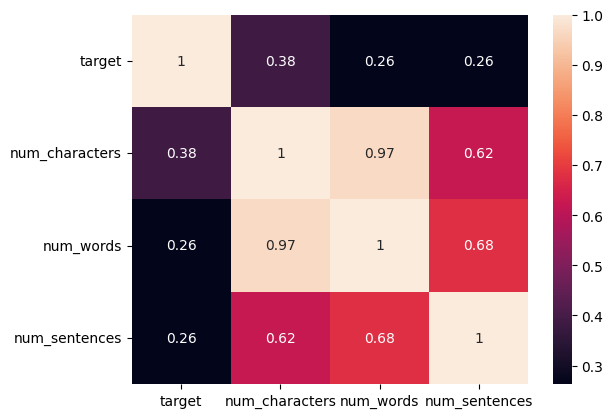

In [424]:
new_df = df.drop(['sms'],axis=1)
sns.heatmap(new_df.corr(),annot=True)

In [426]:
# all the columns are highy correlated, we should take one of these columns only if so then take num_charactes because it is more correlated to
#target in comparision to others

<h3>Text Preprocessing</h3>
<ul>
    <li>Lower case</li>
    <li>Tokenization</li>
    <li>Removing special characters</li>
    <li>Removing stop words and punctuations</li>
    <li>stemming</li>
</ul>

In [431]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    
    stopword = stopwords.words('english')
    for i in text:
        if i not in stopword:
            y.append(i)            

    text = y[:]
    y.clear()

    import string
    punctuation = string.punctuation
    
    for i in text:
        if i not in punctuation:
            y.append(i)

    string = " ".join(y)
    
    text = y[:]
    y.clear() 
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [433]:
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\upadh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [435]:
transform_text('Hi I am Vinay Upadhyay @%#$&($ loving machine learning and enjoying it')

'hi vinay upadhyay love machin learn enjoy'

In [437]:
df['sms'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [439]:
df['sms'][200]

'I sent you  &lt;#&gt;  bucks'

In [441]:
df['sms'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [443]:
df['sms'][1010]

'Lol I would but my mom would have a fit and tell the whole family how crazy and terrible I am'

In [449]:
df['transformed sms'] = df['sms'].apply(transform_text)

In [451]:
df.sample(5)

,target,sms,num_characters,num_words,num_sentences,transformed sms
4291,0,G.W.R,5,1,1,
1282,0,Ever green quote ever told by Jerry in cartoon...,160,42,2,ever green quot ever told jerri cartoon person...
3463,0,My phone,8,2,1,phone
1895,0,"Uh, heads up we don't have THAT much left",41,11,1,uh head much left
3311,0,I know you are serving. I mean what are you do...,54,14,2,know serv mean


In [461]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/301.2 kB 217.9 kB/s eta 0:00:02
   -- ------------------------------------ 20.5/301.2 kB 217.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/301.2 kB 187.9 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/301.2 kB 302.7 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/301.2 kB 368.6 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/301.2 kB 510.2 kB/s eta 0:00:01
   ----------------------- -------------- 184.3/301.2 kB 530.7 kB/s eta 0:00:01
   --------------------------------- ---- 266.2/301.2 kB 654.7 kB/s eta 0:00:01
   -------------------------------------  297.0/301.2 kB 679.4 kB/s eta 0:00:01
   -------------------------------------- 301.2/301.2 kB 642.3 kB/s eta 0:00:00


In [485]:
from wordcloud import WordCloud
wc = WordCloud(height=500,width=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target']==1]['transformed sms'].str.cat(sep=" "))

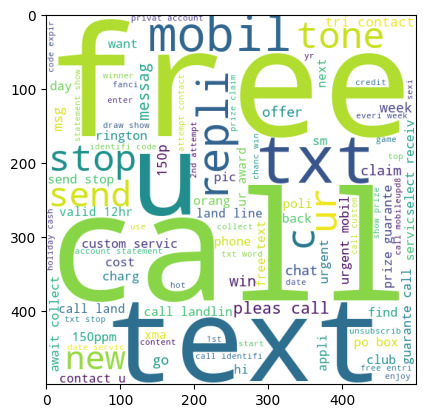

In [519]:
plt.imshow(spam_wc)
plt.show()

In [511]:
from wordcloud import WordCloud
wc2 = WordCloud(height=500,width=500,min_font_size=10,background_color='white')
spam_wc2 = wc.generate(df[df['target']==0]['transformed sms'].str.cat(sep=" "))

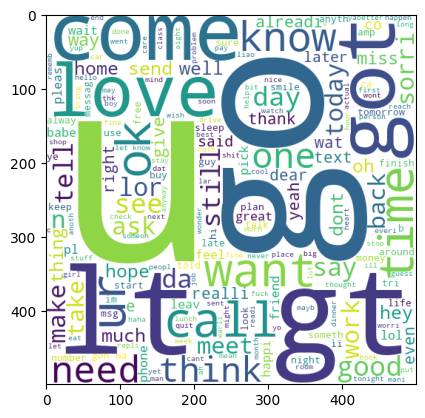

In [521]:
plt.imshow(spam_wc2)
plt.show()

In [537]:
spam_words = []
for sentence in df[df['target']==1]['transformed sms'].tolist():
    for word in sentence.split():
        spam_words.append(word)

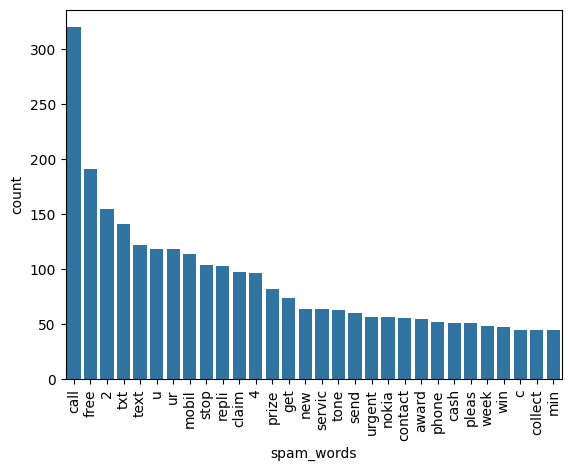

In [613]:
from collections import Counter
Counter(spam_words).most_common(30)  #return dictunary of which word occur how many times in list
sns.barplot(x = pd.DataFrame(Counter(spam_words).most_common(30))[0],y = pd.DataFrame(Counter(spam_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel('spam_words')
plt.ylabel('count')
plt.show()

In [585]:
ham_words = []
for sentence in df[df['target']==0]['transformed sms'].tolist():
    for words in sentence.split():
        ham_words.append(words)

In [589]:
len(ham_words)

35404

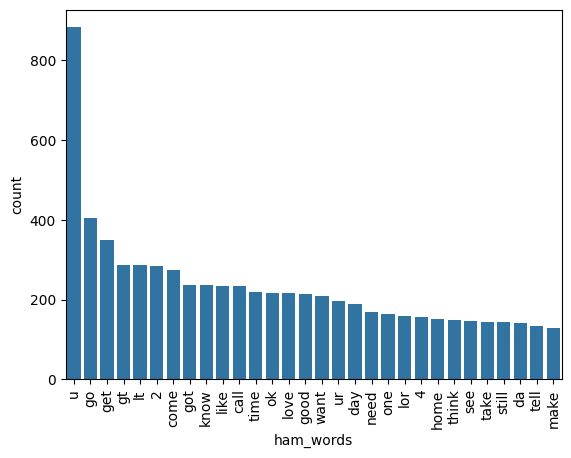

In [611]:
sns.barplot(x = pd.DataFrame(Counter(ham_words).most_common(30))[0],y = pd.DataFrame(Counter(ham_words).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel('ham_words')
plt.ylabel('count')
plt.show()

<h2>Model Testing</h2>

In [683]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer()

In [687]:
x = tfid.fit_transform(df['transformed sms']).toarray()
y = df['target'].values

In [689]:
from sklearn.model_selection import train_test_split

In [691]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [693]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [695]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [697]:
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

[[772 117]
 [ 24 121]]
0.8636363636363636
0.5084033613445378


In [699]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

[[888   1]
 [ 39 106]]
0.9613152804642167
0.9906542056074766


In [701]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

[[885   4]
 [ 31 114]]
0.9661508704061895
0.9661016949152542


<h4>In this precision score is more important because we don't have to say a non-spam message a spam hence mnb is good. We used naive byes because in case of text data it performs well and now as it is giving very good precision we will use it

In [710]:
import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))